<a href="https://colab.research.google.com/github/Rabia-Akhtr/Data-Science-Project-Breast_Cancer_Classification_ML/blob/main/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title:   Evaluating the Performance of Different Machine Learning Models for Breast Cancer Diagnosis**

# **Import Libraries**
Load the required libraries for data manipulation, preprocessing, visualization and modeling.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import tensorflow as tf
from tensorflow.keras.models import Sequential
import itertools
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import os
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import learning_curve

# **Load and Explore the Dataset**
We will use the Breast Cancer Dataset (UCI Machine Learning Repository).

**Dataset Overview**

The dataset contains features computed from digitized images of fine needle aspirate (FNA) tests on breast masses.

**Key Features:**
Attributes like clump thickness, uniformity of cell size/shape, mitoses, etc.

**Dataset size:** 699 samples, with some missing values in the attribute "Bare Nuclei."

**Columns:**
Sample code number (ID, not useful)

Clump Thickness, Uniformity of Cell Size, ..., Bland Chromatin, etc. (features)

**Target Variable:**
Class (2 = benign, 4 = malignant).

In [2]:
def load_and_preprocess_data(url):
    """
    Loads and lightly cleans the Breast Cancer Wisconsin dataset.

    Steps:
    - Assigns proper column names
    - Replaces '?' with NaN
    - Converts 'Bare_Nuclei' to numeric
    - Drops 'ID' column
    - Displays summary info for EDA preparation

    Parameters:
        url (str): URL of the dataset

    Returns:
        pd.DataFrame: Cleaned dataset ready for EDA
    """
    # Column names from UCI repository
    column_names = [
        'ID', 'Clump_Thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape',
        'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
        'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'
    ]

    # Load the dataset
    data = pd.read_csv(url, names=column_names, header=None)
    display(data)

    # Replace '?' with NaN in the entire DataFrame before converting to numeric ***
    data.replace('?', np.nan, inplace=True)

    # Convert 'Bare_Nuclei' to numeric (now possible due to '?'=>NaN)
    data['Bare_Nuclei'] = pd.to_numeric(data['Bare_Nuclei'], errors='coerce')

    # Drop the 'ID' column (not useful for prediction)
    data.drop(columns='ID', inplace=True)

    # Check for missing values and data types
    print("\nDataset Info:")
    print(data.info())

    return data

# URL of the dataset (UCI Breast Cancer Wisconsin Dataset)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"

# Call the function
data = load_and_preprocess_data(url)


,ID,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_Thickness              699 non-null    int64  
 1   Uniformity_Cell_Size         699 non-null    int64  
 2   Uniformity_Cell_Shape        699 non-null    int64  
 3   Marginal_Adhesion            699 non-null    int64  
 4   Single_Epithelial_Cell_Size  699 non-null    int64  
 5   Bare_Nuclei                  683 non-null    float64
 6   Bland_Chromatin              699 non-null    int64  
 7   Normal_Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB
None


### **Missing‑value check**

In [3]:
print("Missing values per column:\n", data.isnull().sum())

Missing values per column:
 Clump_Thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64


In [4]:
data.describe()

,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# **Exploratory Data Analysis (EDA)**

## **Visualize Class Distribution**
This step visualizes the class distribution (Benign vs Malignant) to ensure the dataset is balanced.


Class Distribution:
Class
2    458
4    241
Name: count, dtype: int64


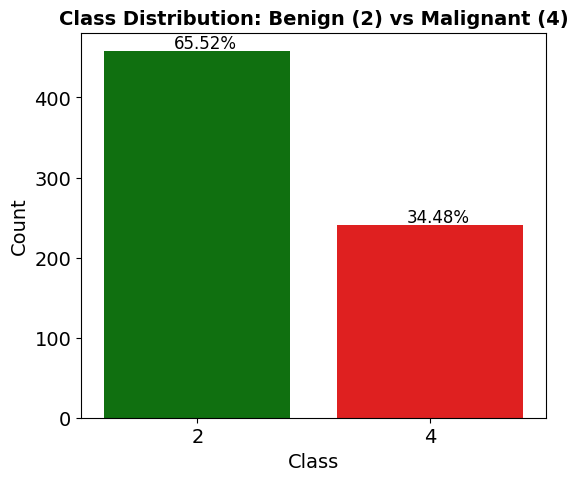

In [5]:
def visualize_class_distribution(data, target_column):
    """
    Visualize the class distribution for the target variable.
    """
    print("\nClass Distribution:")
    print(data[target_column].value_counts())

    colors = {2: "green", 4: "red"}

    # Create count plot
    plt.figure(figsize=(6, 5))

    ax = sns.countplot(x=target_column, hue=target_column, data=data, palette=colors, legend=False)

    # Add percentages on bars
    total = len(data)
    for p in ax.patches:
        percentage = f"{100 * p.get_height() / total:.2f}%"
        ax.annotate(percentage, (p.get_x() + 0.3, p.get_height() + 3), fontsize=12)

    # Titles and labels
    plt.title("Class Distribution: Benign (2) vs Malignant (4)", fontsize=14, fontweight="bold") #Update title to reflect class values
    plt.xlabel("Class", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # Show plot
    plt.show()

# Call function
visualize_class_distribution(data, 'Class')

## **Pie Plot**

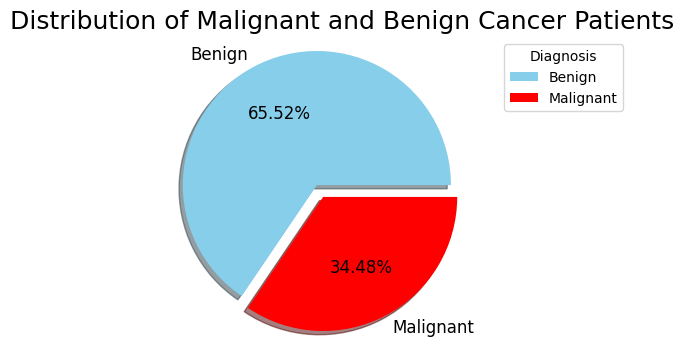

In [6]:
import matplotlib.pyplot as plt

# data['Class'] = data['Class'].map({2: 0, 4: 1})

# Set labels and color palette
custom_palette = ["skyblue", "red"]
labels = ["Benign", "Malignant"]
explode = (0.1, 0)  # Explode the 'Benign' slice for visual emphasis

# Count class distribution
class_counts = data['Class'].value_counts().sort_index()  # Ensure 0=Benign, 1=Malignant

# Plot pie chart
fig, ax = plt.subplots(figsize=(8, 4))
ax.pie(class_counts,
       labels=labels,
       explode=explode,
       autopct='%1.2f%%',
       shadow=True,
       colors=custom_palette,
       textprops=dict(color="black", size=12))

# Draw circle for perfect shape
ax.axis('equal')

# Title and legend
plt.title('Distribution of Malignant and Benign Cancer Patients',
          fontsize=18, color='black', loc='left')
plt.legend(title='Diagnosis', loc='upper right')

# Show the chart
plt.show()


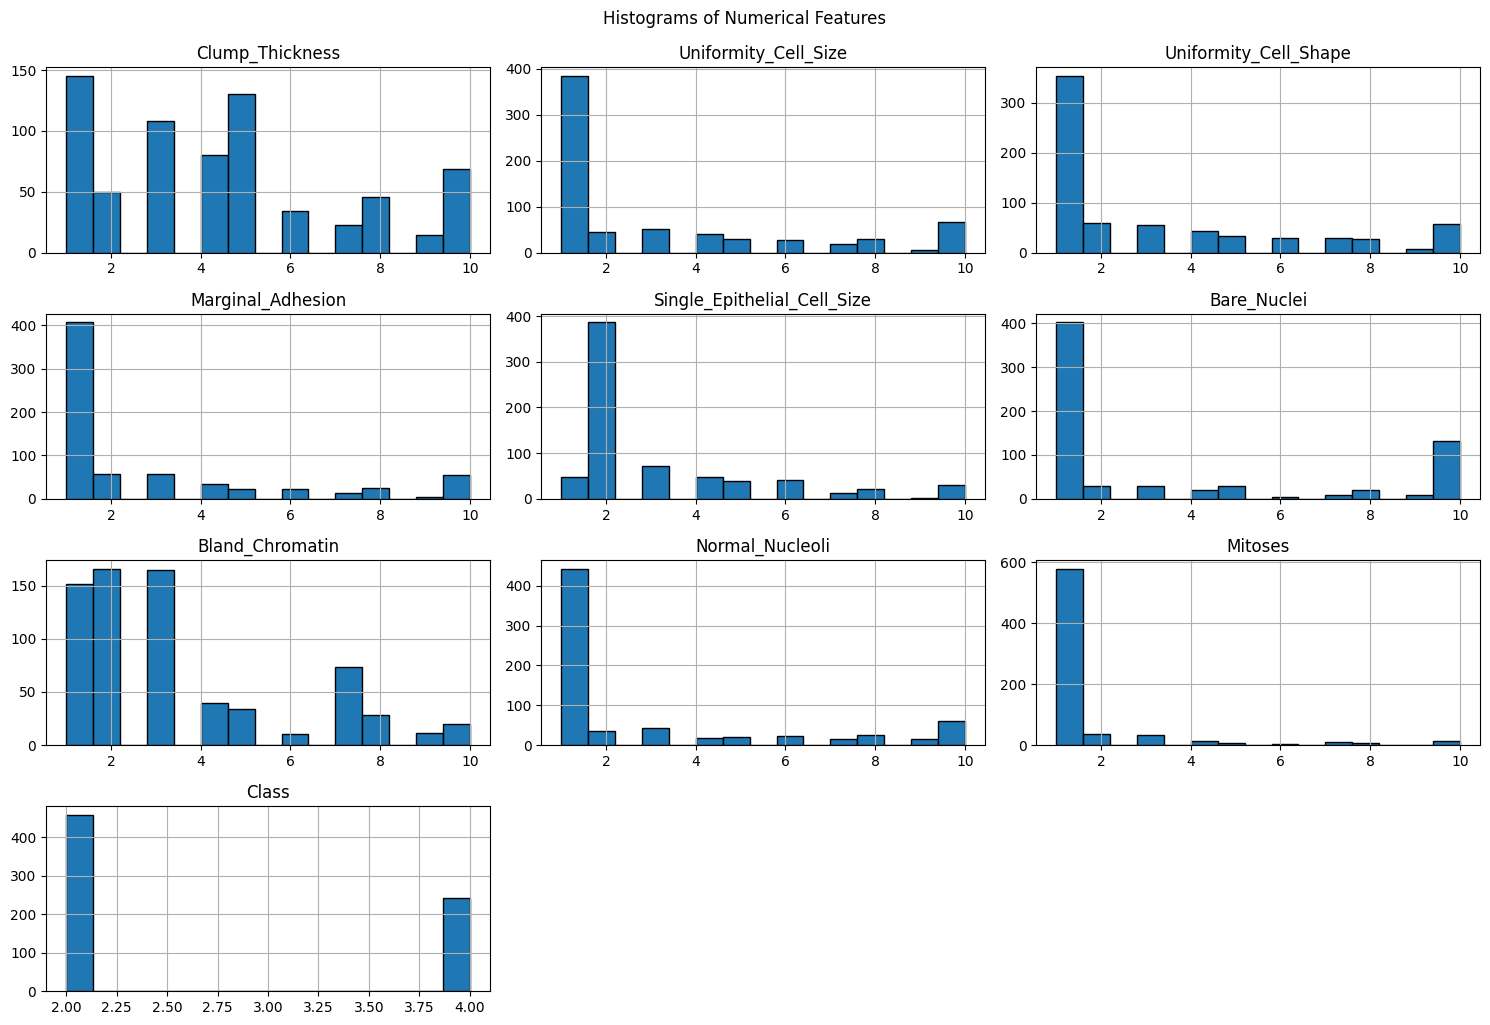

In [7]:
def plot_feature_histograms(data):
    """
    Plots histograms for all numerical features in the dataset.

    Parameters:
        data (pd.DataFrame): The dataset containing numerical features.

    Returns:
        None
    """
    num_features = data.select_dtypes(include=[np.number]).columns.tolist()
    data[num_features].hist(
        bins=15,
        figsize=(15, 10),
        layout=(4, 3),
        edgecolor='black'
    )
    plt.tight_layout()
    plt.suptitle("Histograms of Numerical Features", y=1.02)
    plt.show()
plot_feature_histograms(data)

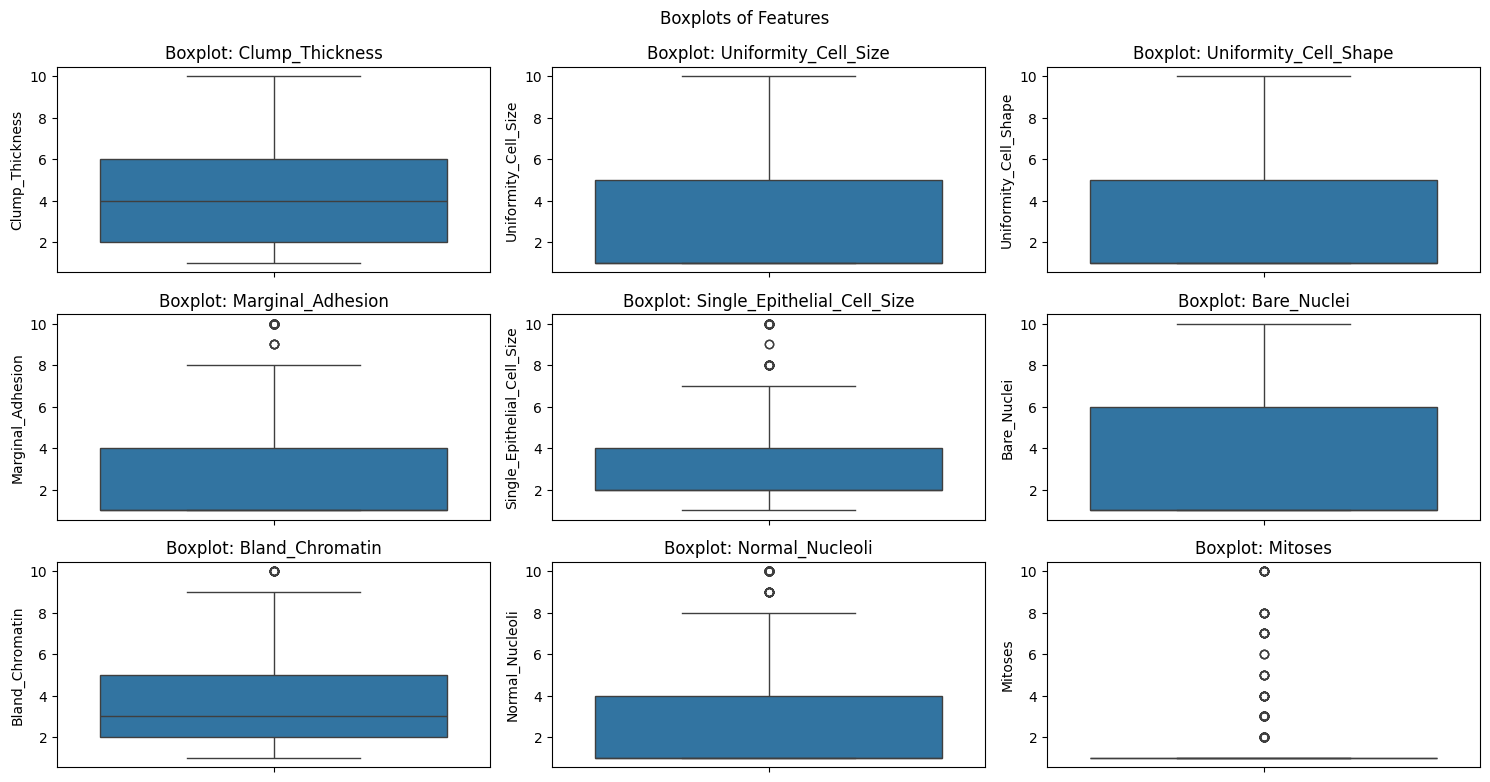

In [8]:
def plot_feature_boxplots(data):
    """
    Plots boxplots for all numerical features to detect outliers.

    Parameters:
        data (pd.DataFrame): The dataset containing numerical features.

    Returns:
        None
    """
    num_features = data.select_dtypes(include=[np.number]).columns.tolist()
    num_features.remove('Class')  # Exclude target variable

    plt.figure(figsize=(15, 10))
    for i, column in enumerate(num_features, 1):
        plt.subplot(4, 3, i)
        sns.boxplot(y=data[column])
        plt.title(f'Boxplot: {column}')
    plt.tight_layout()
    plt.suptitle("Boxplots of Features", y=1.02)
    plt.show()
plot_feature_boxplots(data)

In [9]:
def detect_outliers_iqr(data):
    """
    Detects outliers in each numerical feature using the IQR method.

    Parameters:
        data (pd.DataFrame): The dataset.

    Returns:
        dict: A dictionary with feature names and their respective outlier counts.
    """
    outlier_summary = {}
    num_features = data.select_dtypes(include=[np.number]).columns.tolist()
    num_features.remove('Class')  # Exclude target

    for col in num_features:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))).sum()
        outlier_summary[col] = outliers

    print("Outliers per feature (IQR method):")
    for feature, count in outlier_summary.items():
        print(f"{feature}: {count}")
    return outlier_summary
outlier_summary = detect_outliers_iqr(data)

Outliers per feature (IQR method):
Clump_Thickness: 0
Uniformity_Cell_Size: 0
Uniformity_Cell_Shape: 0
Marginal_Adhesion: 60
Single_Epithelial_Cell_Size: 54
Bare_Nuclei: 0
Bland_Chromatin: 20
Normal_Nucleoli: 77
Mitoses: 120


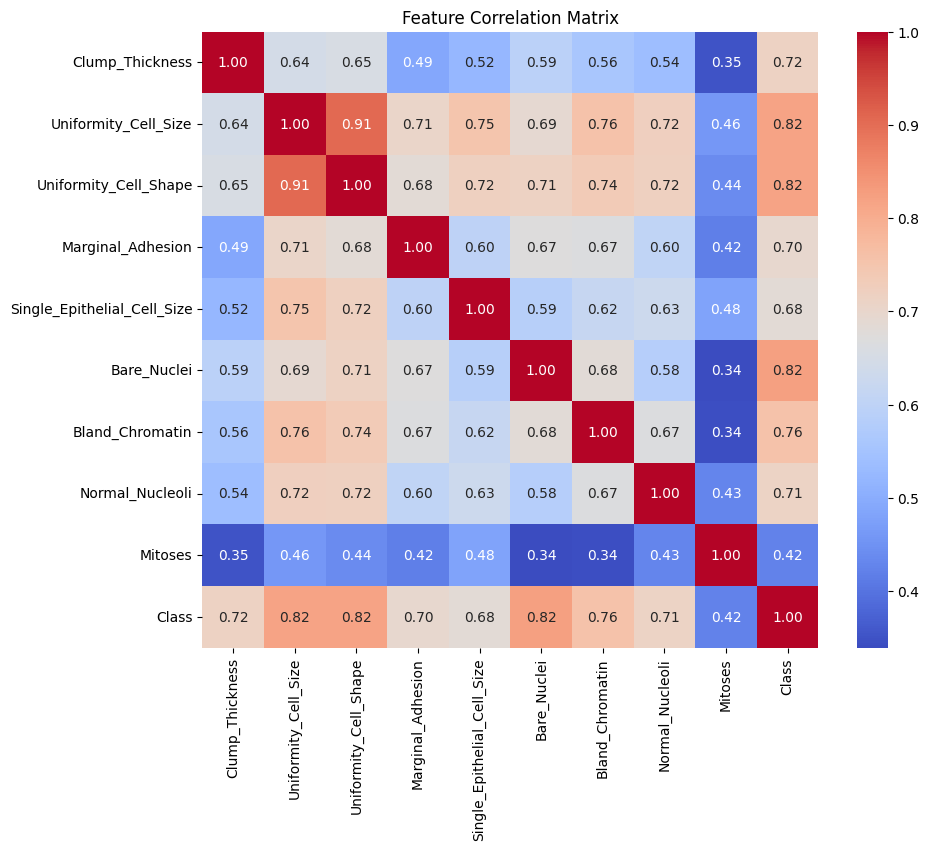

In [10]:
def plot_correlation_heatmap(data):
    """
    Plots a heatmap of the correlation matrix for numerical features.

    Parameters:
        data (pd.DataFrame): The dataset containing numerical features.

    Returns:
        None
    """
    # Select only numerical features for correlation calculation
    numerical_data = data.select_dtypes(include=[np.number])

    corr = numerical_data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
    plt.title("Feature Correlation Matrix")
    plt.show()
plot_correlation_heatmap(data)

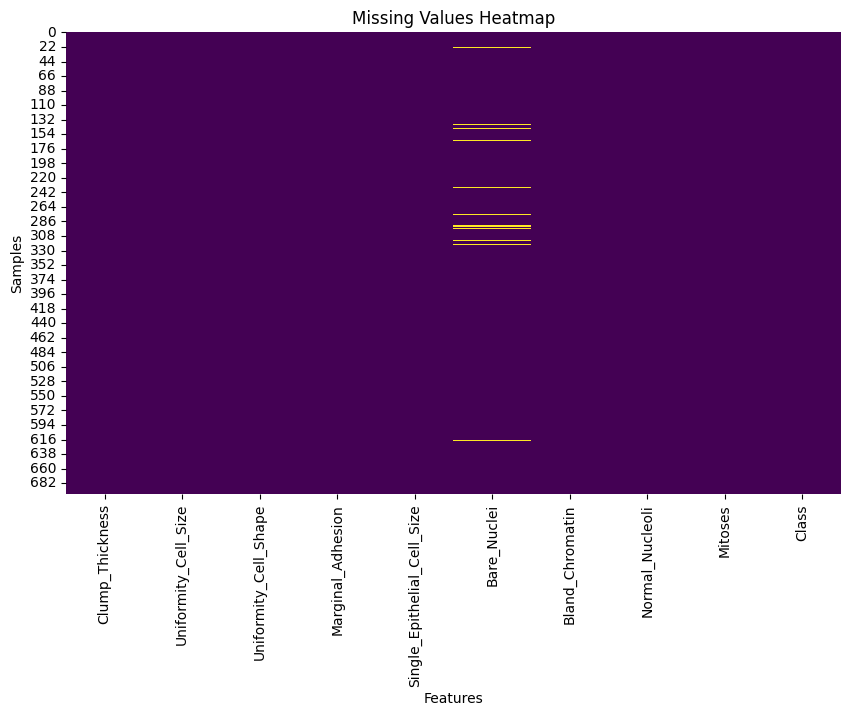

In [11]:
def plot_missing_values_heatmap(data):
    """
    Displays a heatmap of missing values in the dataset.

    Parameters:
        data (pd.DataFrame): The dataset.

    Returns:
        None
    """
    plt.figure(figsize=(10, 6))
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    plt.title("Missing Values Heatmap")
    plt.xlabel("Features")
    plt.ylabel("Samples")
    plt.show()

plot_missing_values_heatmap(data)


### **Data Preprocessing**
Preprocessing ensures data is clean and ready for modeling. Steps include:
1. Dropping unnecessary columns (e.g., 'ID').
2. Handling missing values in the 'Bare_Nuclei' column using median imputation.
3. Encoding the target variable ('Class') as binary (0 = benign, 1 = malignant).
4. Scaling features to standardize input.

In [12]:
def preprocess_data(data, verbose=True):
    """
    Preprocess the Breast Cancer Wisconsin dataset:
    - Drops 'ID' column if present
    - Converts 'Bare_Nuclei' to numeric and imputes missing values with median
    - Converts 'Class' to binary (2 -> 0, 4 -> 1)
    - Splits dataset into training and testing sets (stratified)
    - Normalizes features using StandardScaler

    Args:
        data (pd.DataFrame): Raw dataset
        verbose (bool): Whether to print debug info

    Returns:
        X_train_scaled, X_test_scaled, y_train, y_test, scaler
    """

    # Drop 'ID' column if it exists
    if 'ID' in data.columns:
        data = data.drop(columns=['ID'])

    # Handle missing values in 'Bare_Nuclei'
    data['Bare_Nuclei'] = pd.to_numeric(data['Bare_Nuclei'].replace('?', np.nan), errors='coerce')
    data['Bare_Nuclei'] = data['Bare_Nuclei'].fillna(data['Bare_Nuclei'].median())

    # Convert 'Class' to binary (0 = benign, 1 = malignant)
    data['Class'] = data['Class'].replace({2: 0, 4: 1})

    # Split features and labels
    X = data.drop(columns=['Class'])
    y = data['Class']

   # Stratified split: 70% train, 15% validation, 15% test
    X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

    X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

    # Standardization
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    # Verbose output
    if verbose:
        print("\nMissing values after handling:")
        print(data.isnull().sum())

    return X_train_scaled, X_test_scaled, X_val_scaled, y_train, y_test, y_val, scaler

# Preprocess the dataset
X_train_scaled, X_test_scaled, X_val_scaled, y_train, y_test, y_val, scaler = preprocess_data(data)



Missing values after handling:
Clump_Thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


In [13]:
def major_statistics(data):
    """
    Function to compute major statistics including mean, median, standard deviation,
    skewness, and kurtosis for the given dataset.

    Parameters:
        data (pd.DataFrame): The input dataset.

    Returns:
        pd.DataFrame: A DataFrame containing the computed statistics.
    """

    # Compute statistics
    stats = pd.DataFrame({
        "Mean": data.mean(numeric_only=True),
        "Median": data.median(numeric_only=True),
        "Standard Deviation": data.std(numeric_only=True),
        "Skewness": data.skew(numeric_only=True),
        "Kurtosis": data.kurt(numeric_only=True)
    })

    # Print statistics
    print("\n\033[1mSummary Statistics:\033[0m")

    return stats

# Call the function
major_statistics(data)



Summary Statistics:


,Mean,Median,Standard Deviation,Skewness,Kurtosis
Clump_Thickness,4.417740,4.0,2.815741,0.592859,-0.623715
Uniformity_Cell_Size,3.134478,1.0,3.051459,1.233137,0.098803
Uniformity_Cell_Shape,3.207439,1.0,2.971913,1.161859,0.007011
Marginal_Adhesion,2.806867,1.0,2.855379,1.524468,0.987947
Single_Epithelial_Cell_Size,3.216023,2.0,2.214300,1.712172,2.169066
Bare_Nuclei,3.486409,1.0,3.621929,1.025347,-0.726467
Bland_Chromatin,3.437768,3.0,2.438364,1.099969,0.184621
Normal_Nucleoli,2.866953,1.0,3.053634,1.422261,0.474269
Mitoses,1.589413,1.0,1.715078,3.560658,12.657878
Class,0.344778,0.0,0.475636,0.654564,-1.576064


In [14]:
def build_ann(input_dim, hidden_size, dropout, learning_rate):
    model = Sequential([Input(shape=(input_dim,))])
    for units in hidden_size:
        model.add(Dense(units, activation='relu'))
        if dropout > 0:
            model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

def optimize_ann(X_train, y_train, X_val, y_val,
                 hidden_layer_sizes=[(16,), (32,), (64,), (64, 32), (64, 32, 16)],
                 dropout_rates=[0.0, 0.1],
                 learning_rates=[0.001, 0.01],
                 batch_sizes=[8, 32],
                 max_epochs=100,
                 patience=10,
                 min_delta=1e-4,
                 verbose=0):

    """Grid-search ANN hyperparameters with early stopping."""
    # For reproducibility
    tf.random.set_seed(42)
    np.random.seed(42)

    best_val_acc = 0.
    best_model = None
    best_params = {}
    results = []

    # Prepare callback template
    def make_callback():
        return EarlyStopping(
            monitor='val_loss',
            patience=patience,
            min_delta=min_delta,
            restore_best_weights=True,
            verbose=verbose
        )

    # Iterate over all combinations
    for hidden_size, dropout, lr, batch_size in itertools.product(
            hidden_layer_sizes,
            dropout_rates,
            learning_rates,
            batch_sizes):

        print(f"Testing: hidden={hidden_size}, dropout={dropout}, lr={lr}, batch={batch_size}")
        model = build_ann(X_train.shape[1], hidden_size, dropout, lr)
        hist = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=max_epochs,
            batch_size=batch_size,
            callbacks=[make_callback()],
            verbose=verbose
        )

        val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
        y_pred = (model.predict(X_val) > 0.5).astype(int)
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)

        # Record
        results.append({
            'hidden_size': hidden_size,
            'dropout': dropout,
            'learning_rate': lr,
            'batch_size': batch_size,
            'val_accuracy': val_acc,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'epochs_trained': len(hist.history['loss']),
        })

        # Update best
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model = model
            best_params = {
                'hidden_size': hidden_size,
                'dropout': dropout,
                'learning_rate': lr,
                'batch_size': batch_size,
                'epochs_trained': len(hist.history['loss']),
                'precision': precision,
                'recall': recall,
                'f1_score': f1,
                'val_accuracy': val_acc
            }

    return best_params, best_model

# Usage:
best_params, best_model = optimize_ann(
    X_train_scaled, y_train, X_val_scaled, y_val
)
print(f"Best parameters: {best_params}")
print(f"Best validation accuracy: {best_params['val_accuracy']:.6f}")


Testing: hidden=(16,), dropout=0.0, lr=0.001, batch=8
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Testing: hidden=(16,), dropout=0.0, lr=0.001, batch=32
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Testing: hidden=(16,), dropout=0.0, lr=0.01, batch=8


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Testing: hidden=(16,), dropout=0.0, lr=0.01, batch=32
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Testing: hidden=(16,), dropout=0.1, lr=0.001, batch=8
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Testing: hidden=(16,), dropout=0.1, lr=0.001, batch=32
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Testing: hidden=(16,), dropout=0.1, lr=0.01, batch=8
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Testing: hidden=(16,), dropout=0.1, lr=0.01, batch=32
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Testing: hidden=(32,), dropout=0.0, lr=0.001, batch=8
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Testing: hidden=(32,), dropout=0.0, lr=0.001, batch=32
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Testing: hidden=(32,), dropout=0.0, lr=0.01, batch=8
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Testing: hidden=(32,), dropout=0.0, lr=0.01, batch=32
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Testing: hidden=(32,), dropout=0.1, lr=0.001, batch=8
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Testing: hidden=(32,), dropout=0.1, lr=0.0

In [28]:
def train_ann_with_params(X_train, y_train, X_test, y_test, X_val, y_val,
                          params, seed=42):
    """
    Trains an ANN using the given hyperparameters, evaluates on test set,
    and returns model, history, predictions, and metrics dict.

    parameters should include:
      - hidden_size: tuple of ints
      - dropout: float in [0,1)
      - learning_rate: float
      - batch_size: int
    """
    # Reproducibility
    tf.random.set_seed(seed)
    np.random.seed(seed)

    # Build model
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    for units in params['hidden_size']:
        model.add(Dense(units, activation='relu'))
        if params.get('dropout', 0) > 0:
            model.add(Dropout(params['dropout']))
    model.add(Dense(1, activation='sigmoid'))

    # Compile with training metrics
    model.compile(
        optimizer=Adam(learning_rate=params['learning_rate']),
        loss='binary_crossentropy',
        metrics=['accuracy', 'Precision', 'Recall', 'AUC']
    )

    # Early stopping
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        min_delta=1e-3,
        restore_best_weights=True,
        verbose=1
    )

    # Fit
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=params['batch_size'],
        callbacks=[early_stopping],
        verbose=1
    )

    # Predict on test set
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Manual metrics
    accuracy  = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    cm        = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc_score   = auc(fpr, tpr)

    metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'confusion_matrix': cm,
        'fpr': fpr,
        'tpr': tpr,
        'auc': auc_score
    }
    return model, history, y_pred, metrics

# train
ann_model, ann_history, ann_preds, ann_metrics = train_ann_with_params(
    X_train_scaled, y_train,
    X_test_scaled,  y_test,
    X_val_scaled,   y_val,
    best_params
)

# classification report
print("\nClassification Report:")
print(classification_report(y_test, ann_preds, target_names=['Benign', 'Malignant']))

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - AUC: 0.2795 - Precision: 0.2163 - Recall: 0.2819 - accuracy: 0.3858 - loss: 0.8274 - val_AUC: 0.9336 - val_Precision: 0.8824 - val_Recall: 0.8333 - val_accuracy: 0.9048 - val_loss: 0.4957
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9549 - Precision: 0.8692 - Recall: 0.8012 - accuracy: 0.8936 - loss: 0.4398 - val_AUC: 0.9781 - val_Precision: 0.9211 - val_Recall: 0.9722 - val_accuracy: 0.9619 - val_loss: 0.3082
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9894 - Precision: 0.9234 - Recall: 0.9242 - accuracy: 0.9493 - loss: 0.2749 - val_AUC: 0.9825 - val_Precision: 0.9211 - val_Recall: 0.9722 - val_accuracy: 0.9619 - val_loss: 0.2177
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9929 - Precision: 0.9316 - Recall: 0.9688 - accuracy: 0.9655 - loss: 0.1910 - val_AUC: 0.9863 - val_Precision: 0.9211 - val_Recall: 0.9722 - val_accuracy: 0.9619 - val_loss: 0.1727
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━

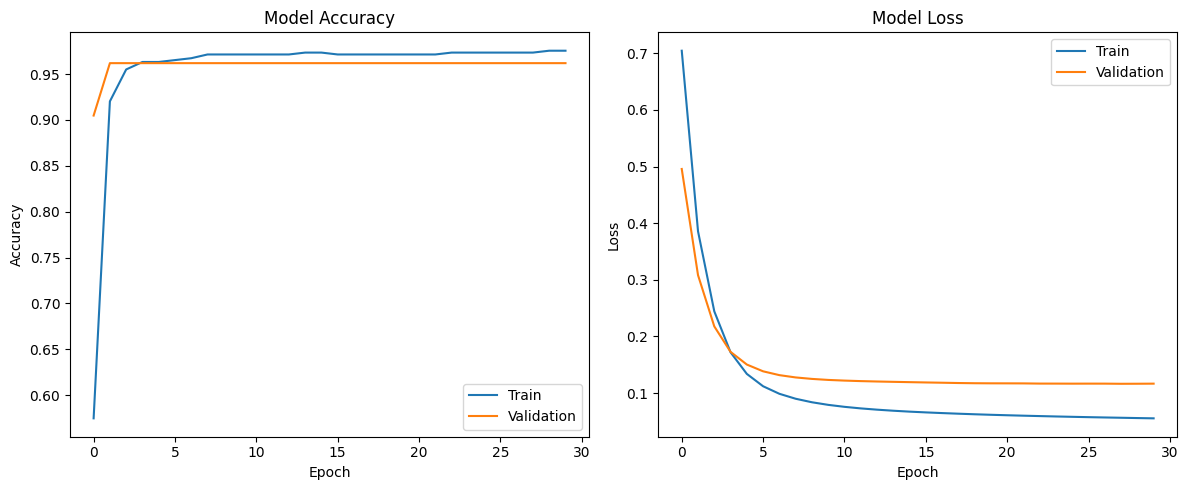

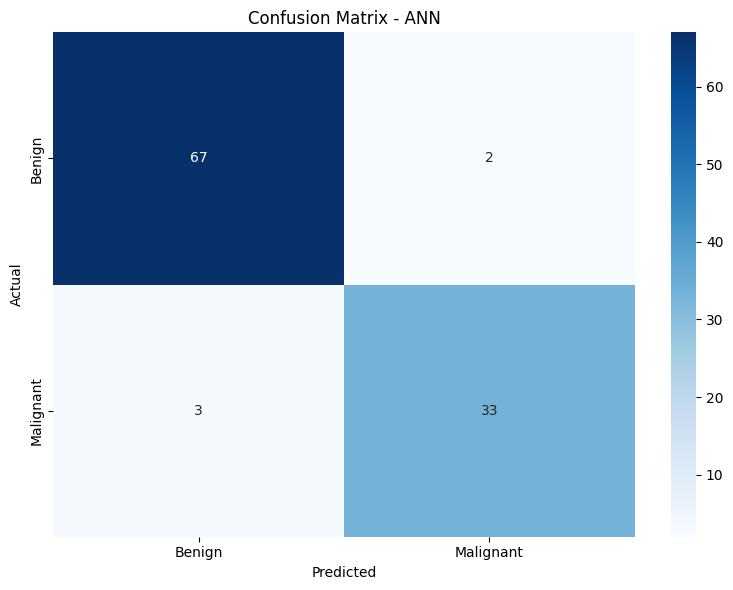

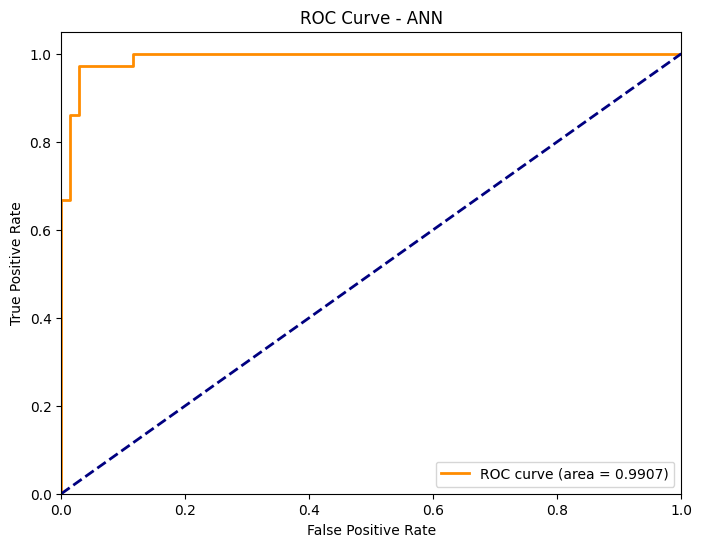


ANN Performance Metrics:
Accuracy: 0.9524
Precision: 0.9429
Recall: 0.9167
F1 Score: 0.9296
AUC: 0.9907


In [29]:
def visualize_ann_results(history, metrics):
    """
    Visualize ANN training history and performance metrics.

    Args:
        history: Training history from model.fit()
        metrics: Dictionary of evaluation metrics
    """
    # Plot training & validation accuracy
    plt.figure(figsize=(12, 5))

    # Training history plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='lower right')

    # Training loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')

    plt.tight_layout()
    plt.savefig('ann_training_history.png')
    plt.show()

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
               xticklabels=['Benign', 'Malignant'],
               yticklabels=['Benign', 'Malignant'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - ANN')
    plt.tight_layout()
    plt.savefig('ann_confusion_matrix.png')
    plt.show()

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(metrics['fpr'], metrics['tpr'], color='darkorange', lw=2,
             label=f'ROC curve (area = {metrics["auc"]:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - ANN')
    plt.legend(loc="lower right")
    plt.savefig('ann_roc_curve.png')
    plt.show()

    # Print metrics
    print("\nANN Performance Metrics:")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1 Score: {metrics['f1']:.4f}")
    print(f"AUC: {metrics['auc']:.4f}")

# CALL FUNCTION
visualize_ann_results(ann_history, ann_metrics)

## **Train and Optimize Decision Tree**

In [17]:
# Define model name
MODEL_NAME = "Decision Tree"

# TRAINING + HYPERPARAMETER OPTIMIZATION
def train_optimize_decision_tree(X_train, y_train):
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [3, 5, 7, 10, 15, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': [None, 'sqrt', 'log2'],
        'class_weight': [None, 'balanced']
    }

    dt = DecisionTreeClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5,
                               scoring='accuracy', n_jobs=-1, verbose=1, return_train_score=True)
    grid_search.fit(X_train, y_train)
    best_dt = grid_search.best_estimator_
    return best_dt, grid_search

# Call Function
best_dt, grid_results = train_optimize_decision_tree(X_train_scaled, y_train)

# Print best parameters and score
print("Best Parameters:")
print(grid_results.best_params_)

print(f"Best CV Accuracy: {grid_results.best_score_:.4f}")

# Print model structure
print("Final Trained Decision Tree:")
print(best_dt)

print(f"Tree Depth: {best_dt.get_depth()}")
print(f"Number of Leaves: {best_dt.get_n_leaves()}")

# Create the 'results' directory if it doesn't exist
os.makedirs("results", exist_ok=True)

# Save all hyperparameter results
results_df = pd.DataFrame(grid_results.cv_results_)
results_df = results_df.sort_values(by="rank_test_score")
results_df.to_csv("results/dt_optimization_results.csv", index=False)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Parameters:
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Accuracy: 0.9652
Final Trained Decision Tree:
DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       max_features='sqrt', random_state=42)
Tree Depth: 5
Number of Leaves: 19


## **Evaluate Decision Tree Performance**

In [18]:
def evaluate_decision_tree(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # ROC curve calculated ONCE
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': auc(fpr, tpr),  # ROC AUC calculated ONCE
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'fpr': fpr,
        'tpr': tpr
    }
    return metrics

# Call Function
dt_metrics = evaluate_decision_tree(best_dt, X_test_scaled, y_test)

# Print metrics
for key, value in dt_metrics.items():
    if isinstance(value, (float, int)):
        print(f"{key.capitalize()}: {value:.4f}")


Accuracy: 0.9143
Precision: 0.8140
Recall: 0.9722
F1: 0.8861
Roc_auc: 0.9672


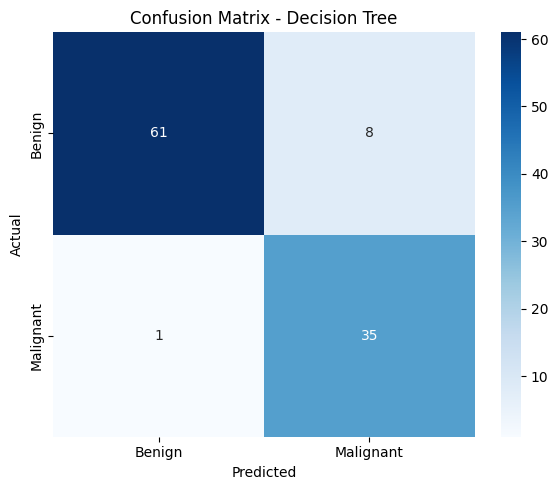

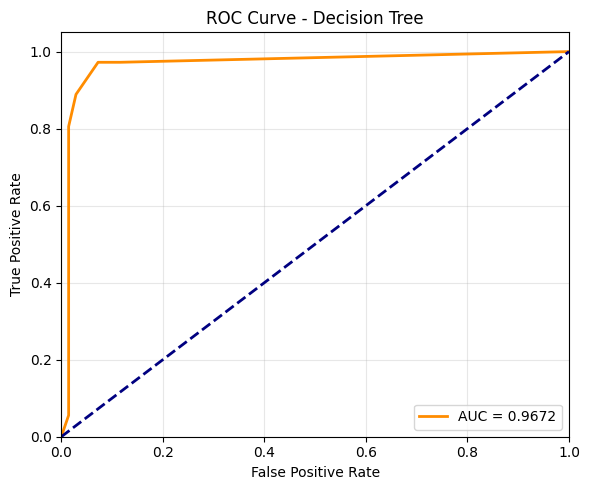

In [19]:
def plot_dt_metrics_separately(metrics, model_name='Decision Tree'):
    # Confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=['Benign', 'Malignant'],
                yticklabels=['Benign', 'Malignant'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.tight_layout()
    plt.show()

    # ROC curve
    plt.figure(figsize=(6, 5))
    plt.plot(metrics['fpr'], metrics['tpr'], color='darkorange',
             lw=2, label=f'AUC = {metrics["roc_auc"]:.4f}')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Call the function
plot_dt_metrics_separately(dt_metrics, model_name='Decision Tree')

## **Analyze Feature Importance**

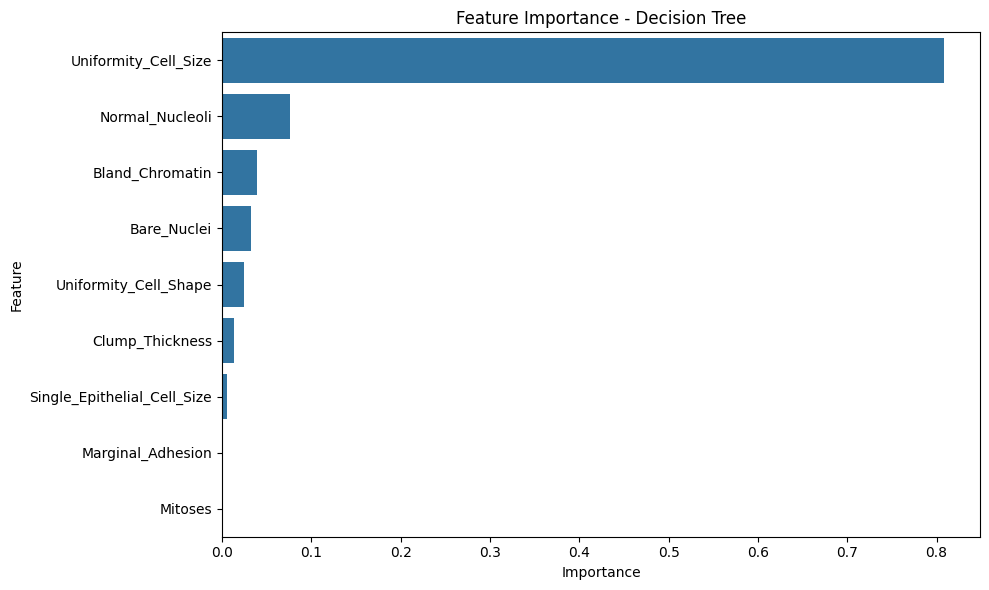


 Classification Report:
              precision    recall  f1-score   support

      Benign       0.98      0.88      0.93        69
   Malignant       0.81      0.97      0.89        36

    accuracy                           0.91       105
   macro avg       0.90      0.93      0.91       105
weighted avg       0.93      0.91      0.92       105



In [20]:
def get_feature_importance(model, feature_names):
    """
    Extract and visualize feature importance using the trained Decision Tree model.

    Args:
        model: Trained DecisionTreeClassifier
        feature_names: List of feature names
    """
    # Extract feature importances from the model
    importance = model.feature_importances_

    # Create DataFrame
    data_importance = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importance
    }).sort_values(by="Importance", ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data_importance, x="Importance", y="Feature")
    plt.title(f"Feature Importance - {MODEL_NAME}")
    plt.tight_layout()
    plt.show()

    return data_importance

# Feature importance
feature_names = data.drop(columns='Class').columns.tolist()
dt_feature_importance = get_feature_importance(best_dt, feature_names)

# Final classification report
print("\n Classification Report:")
print(classification_report(y_test, best_dt.predict(X_test_scaled), target_names=['Benign', 'Malignant']))

## **Train and Optimize SVM**

In [21]:
def train_optimize_svm(X_train, y_train):
    """
    Trains an SVM classifier using GridSearchCV to find the best hyperparameters.

    Args:
        X_train: Scaled training feature set
        y_train: Training labels

    Returns:
        best_svm: Best trained SVM model
        training_time: Time taken for training
        optimization_results: DataFrame with all hyperparameter search results
    """
    # Define hyperparameter
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100, 1000, 5000],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto', 0.0001, 0.001, 0.01, 0.1, 1],
        'degree': [2, 3, 4, 5], # Only used by 'poly' kernel
        'class_weight': [None, 'balanced']
    }

    svm = SVC(random_state=42, probability=True)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    grid_search = GridSearchCV(
        estimator=svm,
        param_grid=param_grid,
        cv=cv,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1,
        return_train_score=True,
    )

    grid_search.fit(X_train, y_train) # Fit the GridSearchCV object
    best_svm = grid_search.best_estimator_

    # Save all optimization results
    optimization_results = pd.DataFrame(grid_search.cv_results_)
    optimization_results = optimization_results[['params', 'mean_test_score', 'std_test_score',
                                                  'mean_train_score', 'std_train_score', 'rank_test_score']]
    optimization_results = optimization_results.sort_values('rank_test_score')

    os.makedirs('results', exist_ok=True)
    optimization_results.to_csv('results/svm_optimization_results.csv', index=False)

    return best_svm, optimization_results

# Call the train_optimize_svm function
best_svm, optimization_results = train_optimize_svm(X_train_scaled, y_train)

print(best_svm)

Fitting 5 folds for each of 1568 candidates, totalling 7840 fits
SVC(C=0.1, degree=2, gamma=1, kernel='sigmoid', probability=True,
    random_state=42)


## **Evaluate the Trained SVM**

In [22]:
def evaluate_svm(model, X_test, y_test):
    """
    Evaluates the performance of the trained SVM model on the test set.

    Args:
        model: Trained SVM classifier
        X_test: Scaled test feature set
        y_test: True labels for the test set

    Returns:
        metrics: Dictionary containing evaluation metrics
    """
    # Get model predictions
    y_pred = model.predict(X_test)

    y_prob = model.predict_proba(X_test)[:, 1]
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': auc(*roc_curve(y_test, y_prob)[:2]),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'fpr': roc_curve(y_test, y_prob)[0],
        'tpr': roc_curve(y_test, y_prob)[1],
    }

    return metrics

svm_metrics = evaluate_svm(best_svm, X_test_scaled, y_test)

print("\n SVM Model Performance Metrics:\n")
for key, value in svm_metrics.items():
    if isinstance(value, (float, int)) and key not in ['fpr', 'tpr']:
        print(f"{key.capitalize():<15}: {value:.4f}")


 SVM Model Performance Metrics:

Accuracy       : 0.9619
Precision      : 0.9444
Recall         : 0.9444
F1             : 0.9444
Roc_auc        : 0.9883


## **Visualize the SVM Results**

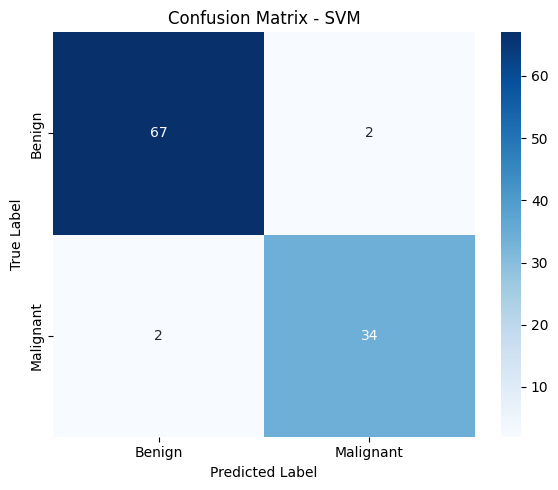

In [23]:
def plot_confusion_matrix(metrics, model_name="SVM"):
    """
    Plots a clean Confusion Matrix for a model.

    Args:
        metrics: Dictionary containing 'confusion_matrix'
        model_name: Name of the model (for title)
    """

    plt.figure(figsize=(6, 5))
    sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=['Benign', 'Malignant'],
                yticklabels=['Benign', 'Malignant'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()

    plt.show()

plot_confusion_matrix(svm_metrics, model_name="SVM")

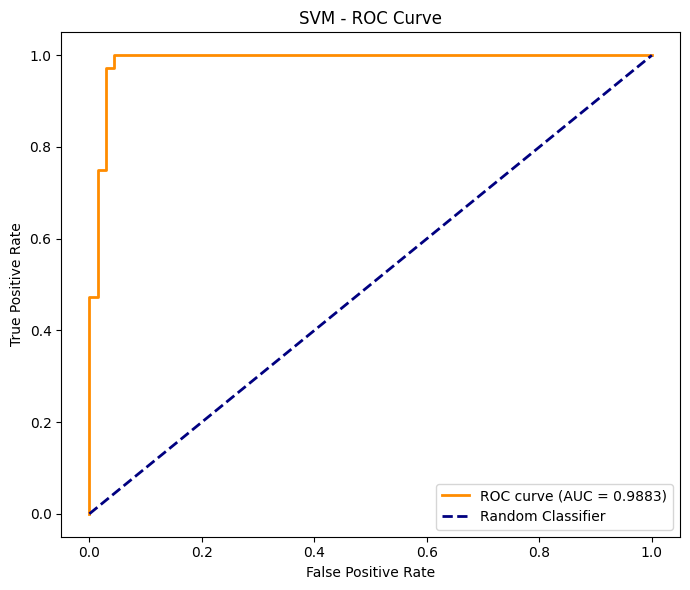

In [24]:
def plot_roc_curve(metrics, model_name="SVM"):
    """
    Plots a clean ROC curve for a model.

    Args:
        metrics: Dictionary containing 'fpr', 'tpr', and 'roc_auc'
        model_name: Name of the model (for title)
    """
    plt.figure(figsize=(7, 6))
    plt.plot(metrics['fpr'], metrics['tpr'], color='darkorange', lw=2,
             label=f'ROC curve (AUC = {metrics["roc_auc"]:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.tight_layout()

    plt.show()

# call the function
plot_roc_curve(svm_metrics, model_name="SVM")

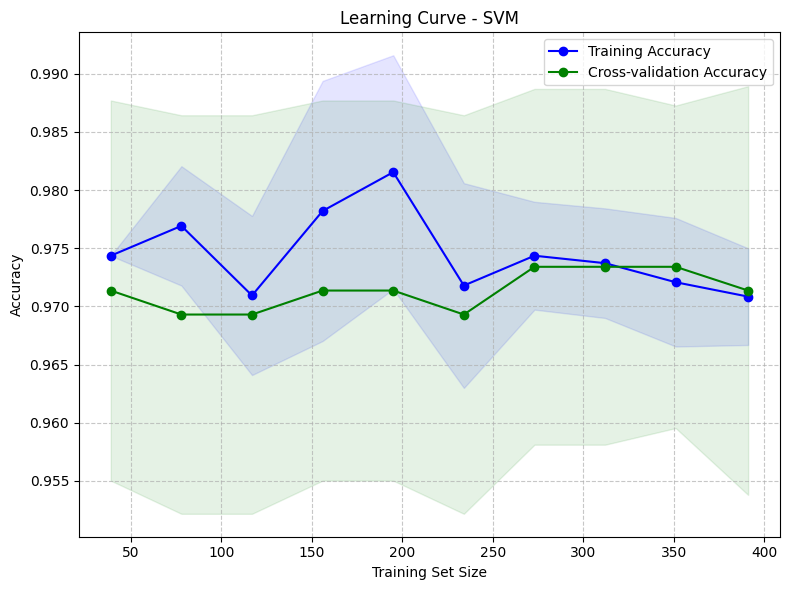

In [25]:
def plot_learning_curve(model, X_train, y_train, model_name="SVM"):
    """
    Plots the learning curve showing training and cross-validation accuracy
    as the training set size increases.

    Args:
        X_train: Scaled training feature set
        y_train: Training labels
        model_name: Name of the model (for title and filename)
    """

    # Define training sizes (10% to 100%)
    train_sizes = np.linspace(0.1, 1.0, 10)

    # Get learning curve results
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train,
        train_sizes=train_sizes,
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )

    # Calculate mean and std for plotting
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
    plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-validation Accuracy')

    # Error bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.1)

    plt.title(f'Learning Curve - {model_name}')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_learning_curve(best_svm, X_train_scaled, y_train, model_name="SVM")

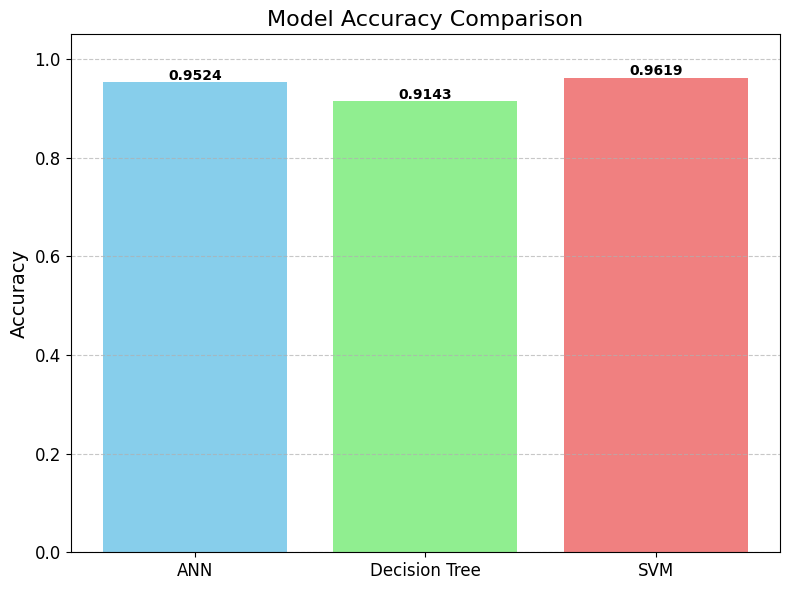

In [26]:
def compare_model_accuracies(ann_metrics, dt_metrics, svm_metrics):
    """
    Compare model accuracies for ANN, Decision Tree, and SVM.

    Args:
        ann_metrics: Dictionary containing ANN evaluation results
        dt_metrics: Dictionary containing Decision Tree evaluation results
        svm_metrics: Dictionary containing SVM evaluation results
    """
    results = {
        'ANN': ann_metrics['accuracy'],
        'Decision Tree': dt_metrics['accuracy'],
        'SVM': svm_metrics['accuracy']
    }

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.bar(results.keys(), results.values(), color=['skyblue', 'lightgreen', 'lightcoral'])

    # Add accuracy labels on top of bars
    for key, value in results.items():
        plt.text(key, value + 0.005, f"{value:.4f}", ha='center', fontweight='bold')

    plt.title("Model Accuracy Comparison", fontsize=16)
    plt.ylabel("Accuracy", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim(0, 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

compare_model_accuracies(ann_metrics, dt_metrics, svm_metrics)

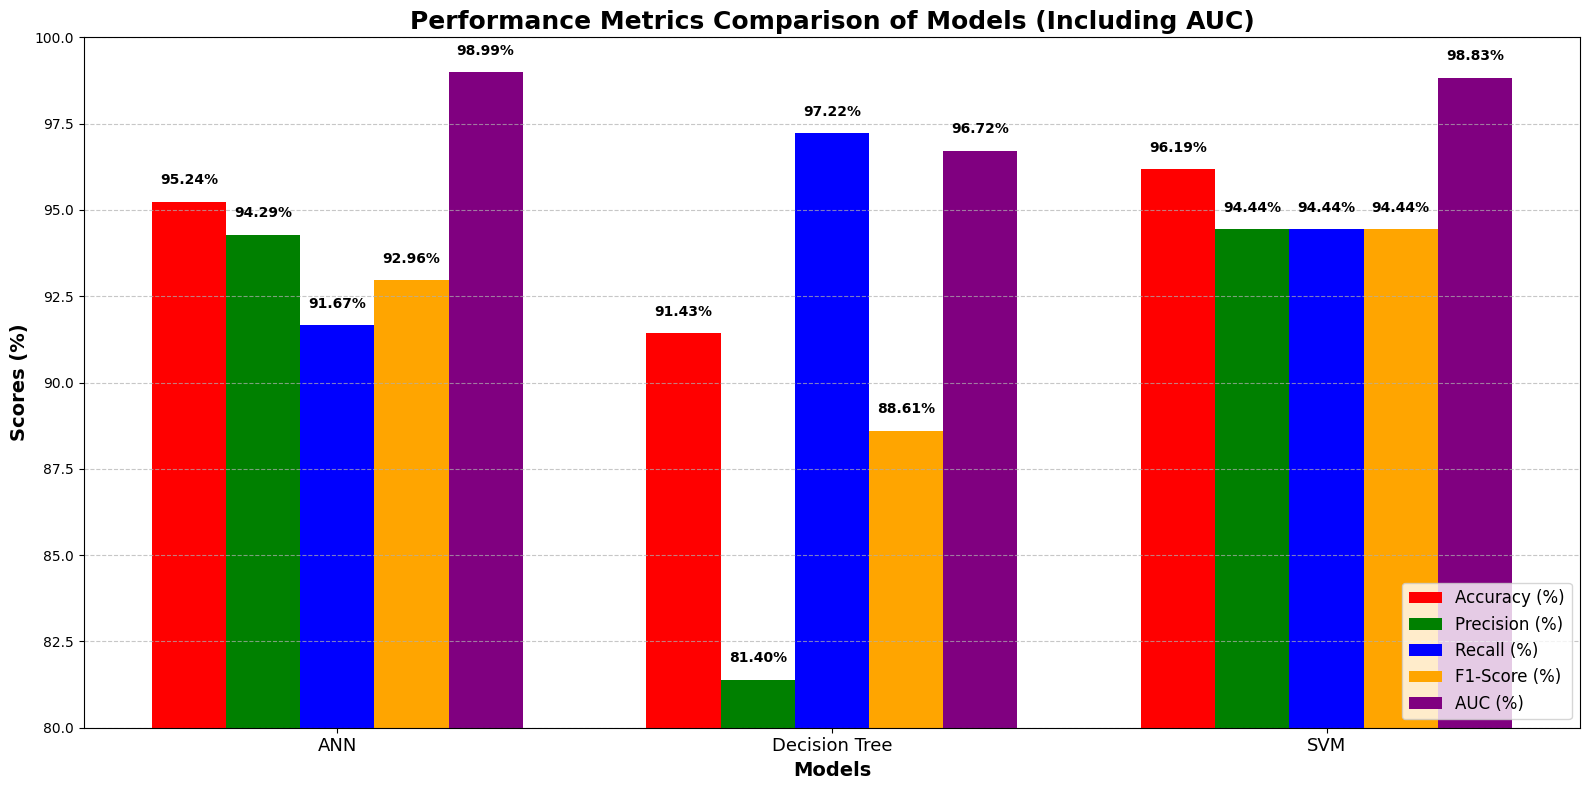

In [27]:
def plot_model_performance_with_auc(ann_metrics, dt_metrics, svm_metrics):
    """
    Plots Accuracy, Precision, Recall, F1-Score, and AUC for ANN, Decision Tree, and SVM models.
    All scores are converted to percentages for better readability.
    """
    # Model names
    model_names = ['ANN', 'Decision Tree', 'SVM']

    # Extract metrics and convert to percentage
    acc_scores = [ann_metrics['accuracy'] * 100, dt_metrics['accuracy'] * 100, svm_metrics['accuracy'] * 100]
    precision_scores = [ann_metrics['precision'] * 100, dt_metrics['precision'] * 100, svm_metrics['precision'] * 100]
    recall_scores = [ann_metrics['recall'] * 100, dt_metrics['recall'] * 100, svm_metrics['recall'] * 100]
    f1_scores = [ann_metrics['f1'] * 100, dt_metrics['f1'] * 100, svm_metrics['f1'] * 100]
    auc_scores = [ann_metrics['auc'] * 100, dt_metrics['roc_auc'] * 100, svm_metrics['roc_auc'] * 100]

    # Bar width and position
    x = np.arange(len(model_names))
    bar_width = 0.15

    # Plot setup
    plt.figure(figsize=(16, 8))
    plt.bar(x - bar_width * 2, acc_scores, width=bar_width, label='Accuracy (%)', color='red')
    plt.bar(x - bar_width, precision_scores, width=bar_width, label='Precision (%)', color='green')
    plt.bar(x, recall_scores, width=bar_width, label='Recall (%)', color='blue')
    plt.bar(x + bar_width, f1_scores, width=bar_width, label='F1-Score (%)', color='orange')
    plt.bar(x + bar_width * 2, auc_scores, width=bar_width, label='AUC (%)', color='purple')

    # Labels and titles
    plt.xlabel('Models', fontsize=14, fontweight='bold')
    plt.ylabel('Scores (%)', fontsize=14, fontweight='bold')
    plt.title('Performance Metrics Comparison of Models (Including AUC)', fontsize=18, fontweight='bold')
    plt.xticks(x, model_names, fontsize=13)
    plt.ylim([80, 100])

    # Annotate bars with bold font
    for i in range(len(model_names)):
        plt.text(x[i] - bar_width * 2, acc_scores[i] + 0.5, f'{acc_scores[i]:.2f}%',
                 ha='center', fontsize=10, fontweight='bold')
        plt.text(x[i] - bar_width, precision_scores[i] + 0.5, f'{precision_scores[i]:.2f}%',
                 ha='center', fontsize=10, fontweight='bold')
        plt.text(x[i], recall_scores[i] + 0.5, f'{recall_scores[i]:.2f}%',
                 ha='center', fontsize=10, fontweight='bold')
        plt.text(x[i] + bar_width, f1_scores[i] + 0.5, f'{f1_scores[i]:.2f}%',
                 ha='center', fontsize=10, fontweight='bold')
        plt.text(x[i] + bar_width * 2, auc_scores[i] + 0.5, f'{auc_scores[i]:.2f}%',
                 ha='center', fontsize=10, fontweight='bold')


    # Grid and legend
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(loc='lower right', fontsize=12)
    plt.tight_layout()
    plt.show()

plot_model_performance_with_auc(ann_metrics, dt_metrics, svm_metrics)

